In [1]:
import pandas as pd

In [2]:
import matplotlib as plt

ModuleNotFoundError: No module named 'matplotlib'

In [3]:
pip install matplotlib

  Using cached matplotlib-3.9.2-cp39-cp39-win_amd64.whl (7.8 MB)
  Using cached fonttools-4.53.1-cp39-cp39-win_amd64.whl (2.2 MB)
  Using cached kiwisolver-1.4.7-cp39-cp39-win_amd64.whl (55 kB)
  Using cached importlib_resources-6.4.5-py3-none-any.whl (36 kB)
  Using cached contourpy-1.3.0-cp39-cp39-win_amd64.whl (211 kB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached pillow-10.4.0-cp39-cp39-win_amd64.whl (2.6 MB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Ayesha Nayyar\OneDrive\Desktop\TASK1\task1\Scripts\python.exe -m pip install --upgrade pip' command.


In [4]:
pip install pip==24.2

  Using cached pip-24.2-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 21.2.3
    Uninstalling pip-21.2.3:
      Successfully uninstalled pip-21.2.3
Note: you may need to restart the kernel to use updated packages.


In [5]:
#load the dataset
file_path = 'Instagram-Reach.csv'
data = pd.read_csv(r'D:\Internship\Task 1\Instagram-Reach.csv')

In [6]:
#print the dataset
print(data.head())

         Date  Instagram reach
0  2022-04-01             7620
1  2022-04-02            12859
2  2022-04-03            16008
3  2022-04-04            24349
4  2022-04-05            20532


In [7]:
#to find null values
print("Null values in the dataset:")
print(data.isnull().sum())

Null values in the dataset:
Date               0
Instagram reach    0
dtype: int64


In [9]:
#to find column information
print("\nColumn information:")
print(data.info())


Column information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             365 non-null    object
 1   Instagram reach  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB
None


In [10]:
#print descriptive statistics
print("\nDescriptive statistics:")
print(data.describe())


Descriptive statistics:
       Instagram reach
count       365.000000
mean      50474.712329
std       30051.787552
min        7620.000000
25%       25070.000000
50%       43987.000000
75%       68331.000000
max      161998.000000


In [11]:
#convert the Date column into datetime datatype to move forward.
data['Date'] = pd.to_datetime(data['Date'])
print(data)

          Date  Instagram reach
0   2022-04-01             7620
1   2022-04-02            12859
2   2022-04-03            16008
3   2022-04-04            24349
4   2022-04-05            20532
..         ...              ...
360 2023-03-27            15622
361 2023-03-28            18645
362 2023-03-29            41238
363 2023-03-30            50490
364 2023-03-31            22014

[365 rows x 2 columns]


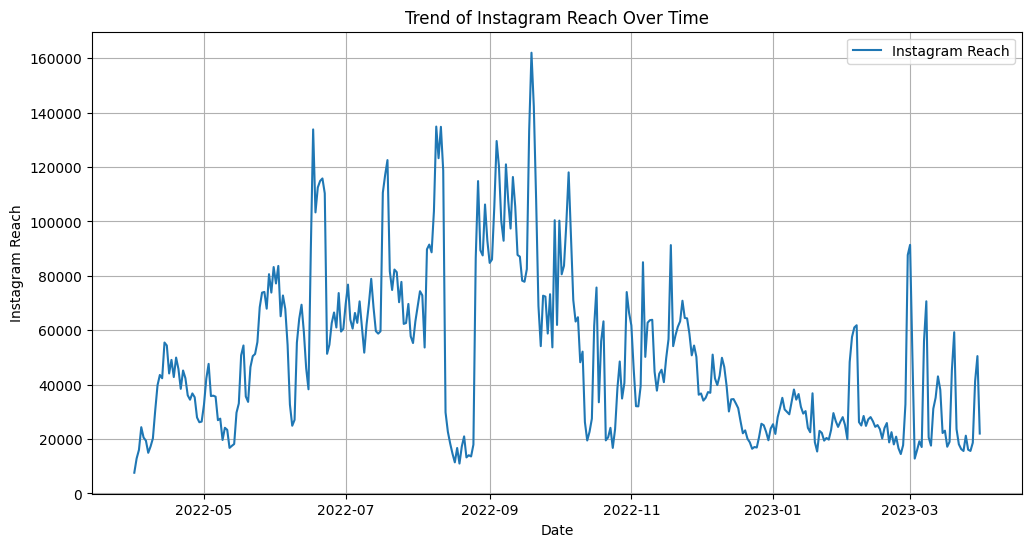

In [16]:
#Analyze the trend of Instagram reach over time using a line chart
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Instagram reach'], label='Instagram Reach')
plt.xlabel('Date')
plt.ylabel('Instagram Reach')
plt.title('Trend of Instagram Reach Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
import matplotlib.pyplot as plt

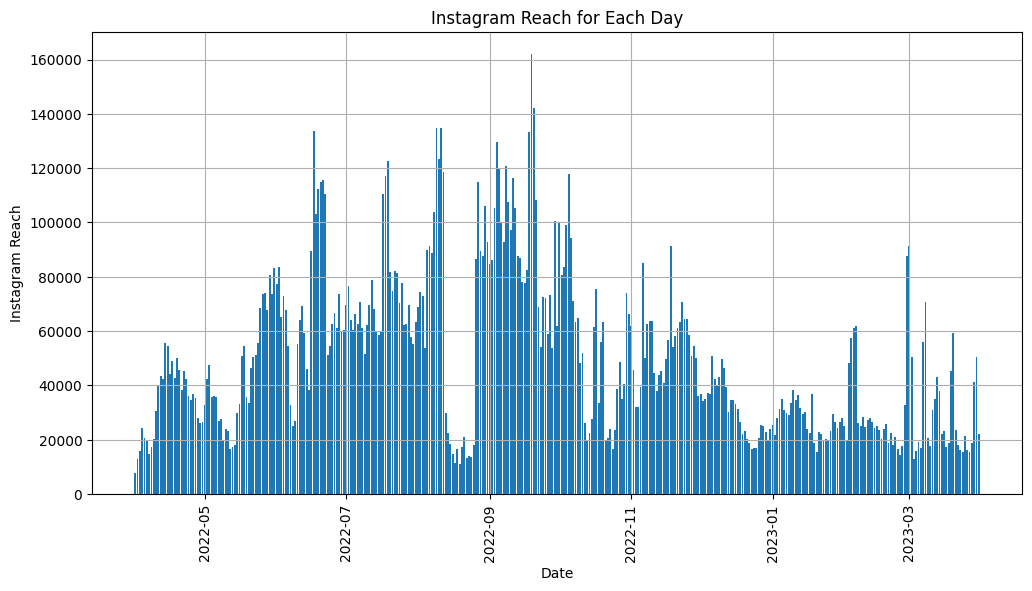

In [17]:
# Analyze Instagram reach for each day using a bar chart.
plt.figure(figsize=(12, 6))
plt.bar(data['Date'], data['Instagram reach'])
plt.xlabel('Date')
plt.ylabel('Instagram Reach')
plt.title('Instagram Reach for Each Day')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

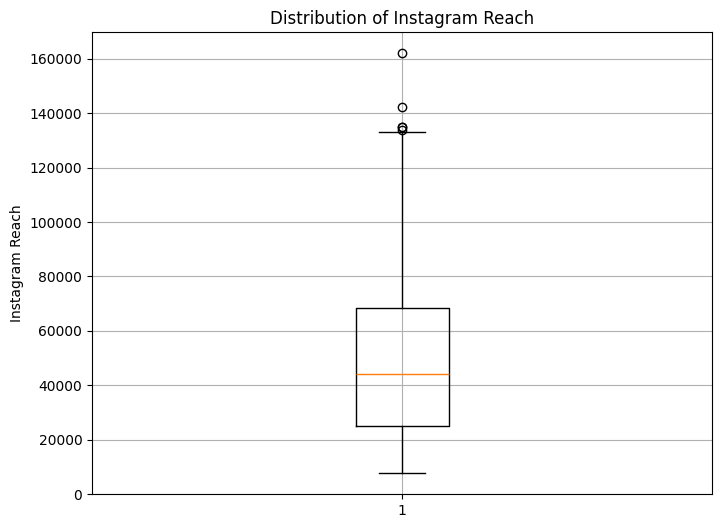

In [18]:
# Analyze the distribution of Instagram reach using a box plot.
plt.figure(figsize=(8, 6))
plt.boxplot(data['Instagram reach'])
plt.ylabel('Instagram Reach')
plt.title('Distribution of Instagram Reach')
plt.grid(True)
plt.show()

In [19]:
# Now create a day column and analyze reach based on the days of the week to extract the day of the week from the Date column
data['Day'] = data['Date'].dt.day_name()

In [20]:
#Now analyze the reach based on the days of the week. For this, you can group the DataFrame by the Day column and calculate the mean, median, and standard deviation of theInstagram reach column for each day.
day_stats = data.groupby('Day')['Instagram reach'].agg(['mean', 'median', 'std']).reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

print("\nInstagram Reach statistics by day of the week:")
print(day_stats)


Instagram Reach statistics by day of the week:
                   mean   median           std
Day                                           
Monday     52621.692308  46853.0  32296.071347
Tuesday    54030.557692  48786.0  32503.726482
Wednesday  51017.269231  42320.5  29047.869685
Thursday   48570.923077  39150.0  28623.220625
Friday     46666.849057  35574.0  29856.943036
Saturday   47374.750000  40012.0  27667.043634
Sunday     53114.173077  47797.0  30906.162384


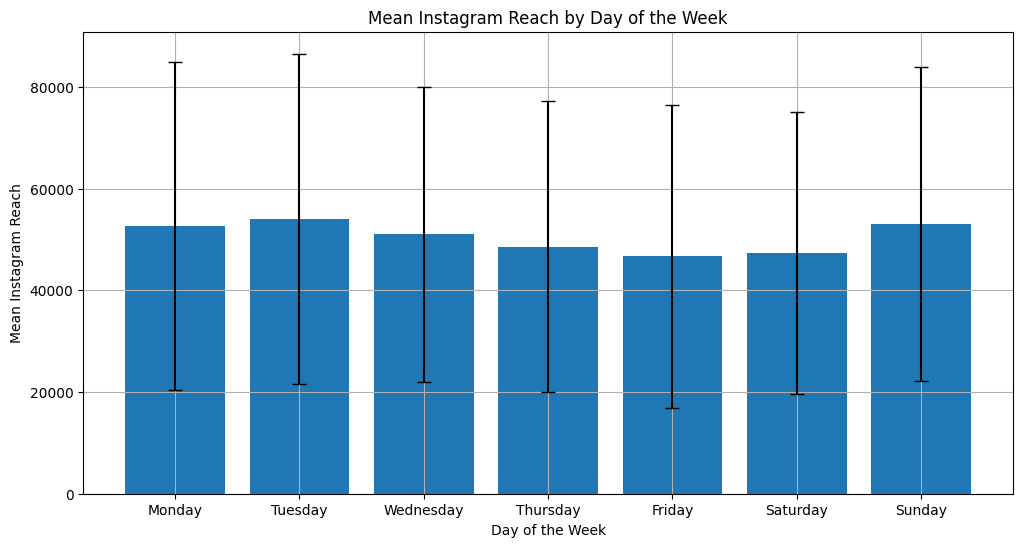

In [21]:
#Now create a bar chart to visualize the reach for each day of the week.
plt.figure(figsize=(12, 6))
plt.bar(day_stats.index, day_stats['mean'], yerr=day_stats['std'], capsize=5)
plt.xlabel('Day of the Week')
plt.ylabel('Mean Instagram Reach')
plt.title('Mean Instagram Reach by Day of the Week')
plt.grid(True)
plt.show()

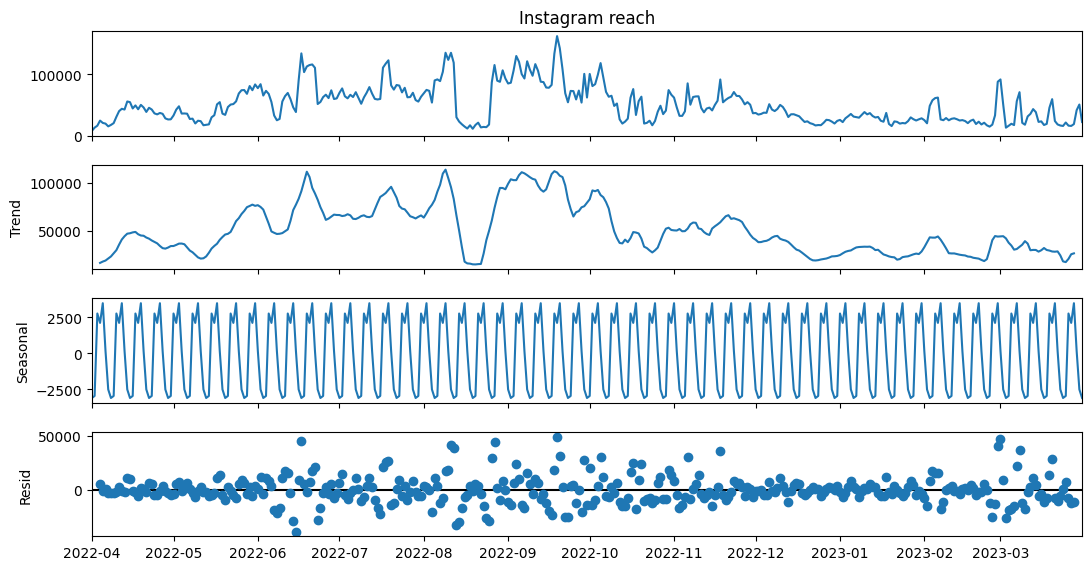

In [27]:
#Decompose the time series to observe trend and seasonality
decomposition = sm.tsa.seasonal_decompose(data.set_index('Date')['Instagram reach'], model='additive')
fig = decomposition.plot()
fig.set_size_inches(12, 6)
plt.show()

In [26]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAXResults

In [24]:
pip install statsmodels

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.9 MB 2.8 MB/s eta 0:00:04
   ---- ----------------------------------- 1.0/9.9 MB 2.5 MB/s eta 0:00:04
   ------ --------------------------------- 1.6/9.9 MB 2.5 MB/s eta 0:00:04
   -------- ------------------------------- 2.1/9.9 MB 2.4 MB/s eta 0:00:04
   ---------- ----------------------------- 2.6/9.9 MB 2.5 MB/s eta 0:00:03
   ------------ --------------------------- 3.1/9.9 MB 2.5 MB/s eta 0:00:03
   -------------- ------------------------- 3.7/9.9 MB 2.5 MB/s eta 0:00:03
   ----------------- ---------------------- 4.2/9.9 MB 2.4 MB/s eta 0:00:03
   ------------------- -------------------- 4.7/9.9 MB 2.5 MB/s eta 0:00:03
   --------------------- ------------------ 5.2/9.9 MB 2.5 MB/s eta 0:00:02
   ----------------------- ---------------- 5.8/9.9 MB 2.4 MB/s eta 0:00:02
   ------------------------- -------------- 6.3/9.9 MB 2.4 MB/s eta 0:00:02
   ----------------

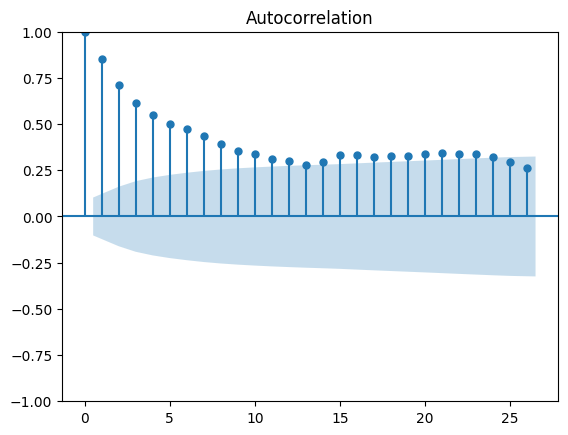

In [28]:
#Determine the order of differencing (d) by observing the autocorrelation plot
sm.graphics.tsa.plot_acf(data['Instagram reach'])
plt.show()

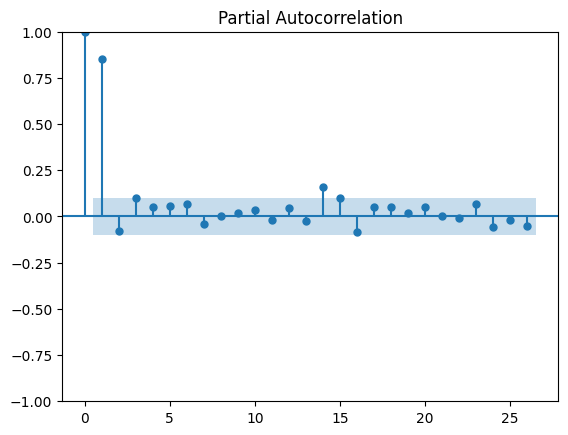

In [29]:
#Determine the order of AR (p) and MA (q) by observing the partial autocorrelation plot
sm.graphics.tsa.plot_pacf(data['Instagram reach'])
plt.show()

In [30]:
#Fit the SARIMA model
p = 1  # determined from PACF plot
d = 1  # generally starting with 1 for differencing
q = 1  # determined from ACF plot
seasonal_p = 1
seasonal_d = 1
seasonal_q = 1
seasonal_period = 12  # Assuming monthly seasonality for simplicity

model = SARIMAX(data['Instagram reach'], order=(p, d, q), seasonal_order=(seasonal_p, seasonal_d, seasonal_q, seasonal_period))
results = model.fit()

In [31]:
#Print model Summary
print("\nModel Summary:")
print(results.summary())


Model Summary:
                                     SARIMAX Results                                      
Dep. Variable:                    Instagram reach   No. Observations:                  365
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -3944.546
Date:                            Tue, 10 Sep 2024   AIC                           7899.092
Time:                                    18:30:01   BIC                           7918.410
Sample:                                         0   HQIC                          7906.779
                                            - 365                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7847      0.086      9.116      0.000       0.616       0.953
ma.L1         -0.95

In [32]:
#Save model to a file
results.save('sarima_model.pkl')

In [33]:
#make predictions
forecast_steps = 30  # Number of periods to forecast
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=data['Date'].iloc[-1], periods=forecast_steps+1, freq='D')[1:]
forecast_series = pd.Series(forecast.predicted_mean.values, index=forecast_index)

In [34]:
#print the predictions
print("\nForecasted Reach for the Next 30 Days:")
print(forecast_series)


Forecasted Reach for the Next 30 Days:
2023-04-01    25495.709383
2023-04-02    15587.001199
2023-04-03    17084.540065
2023-04-04    23202.162357
2023-04-05    30705.771939
2023-04-06    33421.502648
2023-04-07    26678.168769
2023-04-08    16168.573990
2023-04-09    18335.157035
2023-04-10    19017.444402
2023-04-11    21473.461311
2023-04-12    27403.419672
2023-04-13    30416.906358
2023-04-14    17820.849574
2023-04-15    18104.911175
2023-04-16    23111.823376
2023-04-17    29604.690279
2023-04-18    32167.206932
2023-04-19    25256.921324
2023-04-20    15219.006551
2023-04-21    17274.208376
2023-04-22    19323.584770
2023-04-23    22140.314401
2023-04-24    25631.892804
2023-04-25    28612.977653
2023-04-26    16150.371437
2023-04-27    16477.839961
2023-04-28    21529.667845
2023-04-29    28067.310835
2023-04-30    30621.139963
Freq: D, dtype: float64


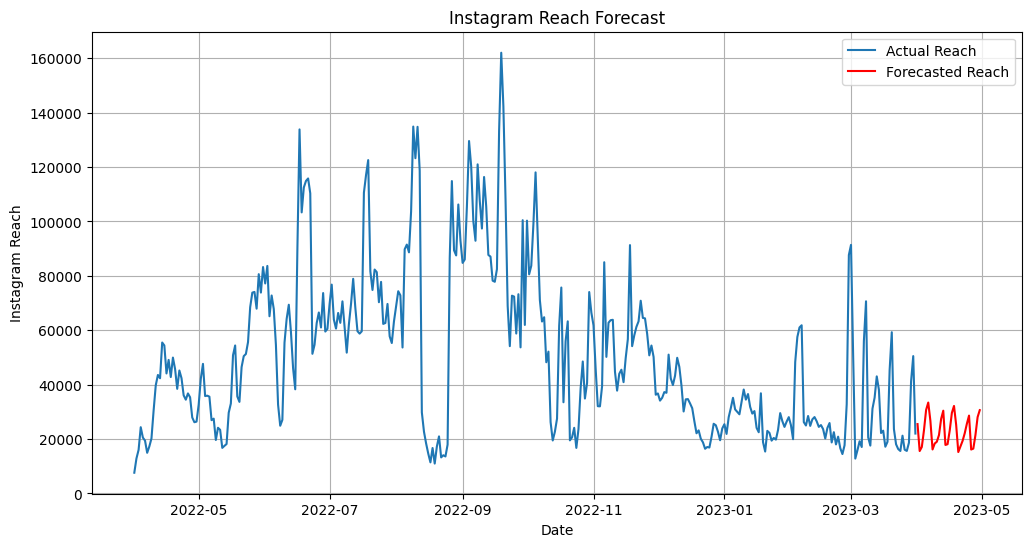

In [35]:
#Plot the actual Data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Instagram reach'], label='Actual Reach')
plt.plot(forecast_series, label='Forecasted Reach', color='red')
plt.xlabel('Date')
plt.ylabel('Instagram Reach')
plt.title('Instagram Reach Forecast')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
#Load the model from the file
loaded_model = SARIMAXResults.load('sarima_model.pkl')

In [37]:
#Use the loaded model to make predictions
forecast_loaded = loaded_model.get_forecast(steps=30)
forecast_loaded_index = pd.date_range(start=data['Date'].iloc[-1], periods=31, freq='D')[1:]
forecast_loaded_series = pd.Series(forecast_loaded.predicted_mean.values, index=forecast_loaded_index)

In [38]:
#Print the predictions from the loaded model
print("\nForecasted Reach for the Next 30 Days (Loaded Model):")
print(forecast_loaded_series)


Forecasted Reach for the Next 30 Days (Loaded Model):
2023-04-01    25495.709383
2023-04-02    15587.001199
2023-04-03    17084.540065
2023-04-04    23202.162357
2023-04-05    30705.771939
2023-04-06    33421.502648
2023-04-07    26678.168769
2023-04-08    16168.573990
2023-04-09    18335.157035
2023-04-10    19017.444402
2023-04-11    21473.461311
2023-04-12    27403.419672
2023-04-13    30416.906358
2023-04-14    17820.849574
2023-04-15    18104.911175
2023-04-16    23111.823376
2023-04-17    29604.690279
2023-04-18    32167.206932
2023-04-19    25256.921324
2023-04-20    15219.006551
2023-04-21    17274.208376
2023-04-22    19323.584770
2023-04-23    22140.314401
2023-04-24    25631.892804
2023-04-25    28612.977653
2023-04-26    16150.371437
2023-04-27    16477.839961
2023-04-28    21529.667845
2023-04-29    28067.310835
2023-04-30    30621.139963
Freq: D, dtype: float64


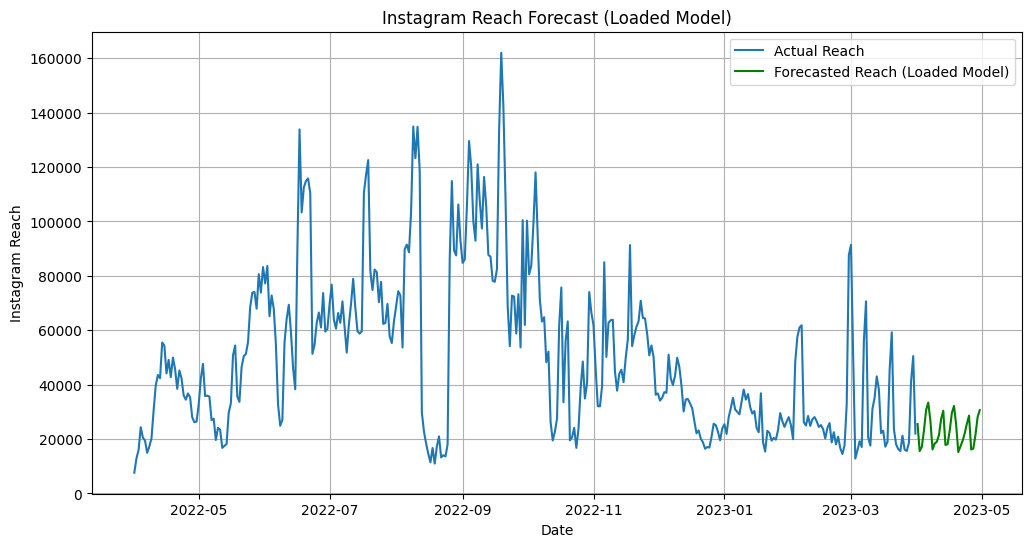

In [39]:
#Plot the actual data and the forecast from the loaded model
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Instagram reach'], label='Actual Reach')
plt.plot(forecast_loaded_series, label='Forecasted Reach (Loaded Model)', color='green')
plt.xlabel('Date')
plt.ylabel('Instagram Reach')
plt.title('Instagram Reach Forecast (Loaded Model)')
plt.legend()
plt.grid(True)
plt.show()